import neccessary liberaries

In [106]:
import yfinance as yf
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../models'))

# Load Tesla data
tsla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')['Adj Close']
BND_data = yf.download('BND', start='2010-01-01', end='2023-12-31')['Adj Close']
SPY_data = yf.download('SPY', start='2010-01-01', end='2023-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


import the class form scripts folder 

In [107]:
from TimeSeriesForecast import TimeSeriesForecast

instantiate the class

In [108]:
# Instantiate the forecasting class
TimeSeriesForecas = TimeSeriesForecast(tsla_data)
TimeSeriesForecast_for_spy = TimeSeriesForecast(SPY_data)
TimeSeriesForecast_for_bnd = TimeSeriesForecast(BND_data)



Data split into 2720 training samples and 680 testing samples.
Data split into 2817 training samples and 705 testing samples.
Data split into 2817 training samples and 705 testing samples.


In [109]:
# Split data into train and test sets
train_tsla = tsla_data.iloc[:int(0.8*len(tsla_data))]
test_tsla = tsla_data.iloc[int(0.8*len(tsla_data)):]

ARIMA model

In [110]:
# Train the ARIMA model
TimeSeriesForecas.train_arima(order=(5, 1, 0))



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model trained successfully.


In [111]:
# Forecast future stock prices
predictions = TimeSeriesForecas.forecast_arima()



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [112]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecas.evaluate_forecast()



Mean Absolute Error (MAE): 44.76951005016132
Root Mean Squared Error (RMSE): 58.45733650633049
Mean Absolute Percentage Error (MAPE): 19.10712190739271%


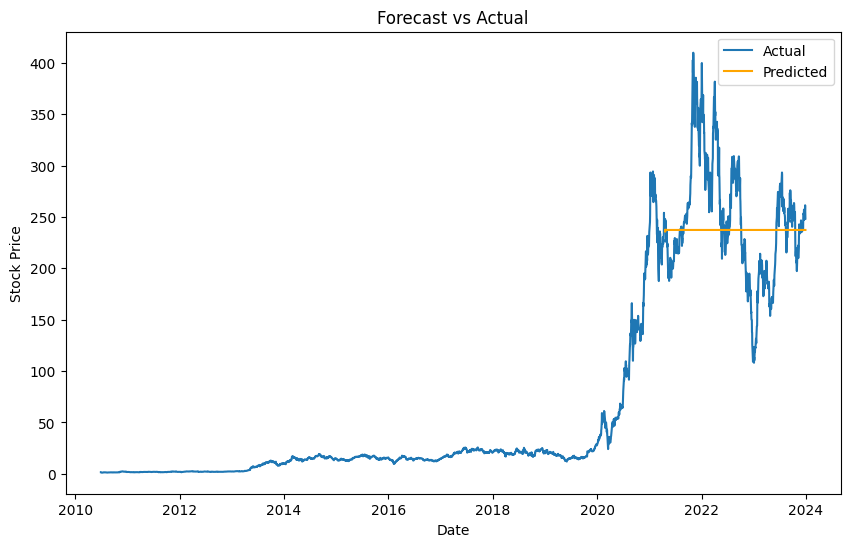

In [113]:
# Plot the results
TimeSeriesForecas.plot_forecast()

SARIMA model

In [114]:
# Train the SARIMA model
TimeSeriesForecas.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA model trained successfully.


In [115]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecas.forecast_sarima()



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [116]:
# Evaluate the forecast
TimeSeriesForecas.evaluate_forecast()


Mean Absolute Error (MAE): 141.98606557414152
Root Mean Squared Error (RMSE): 174.62709288533625
Mean Absolute Percentage Error (MAPE): 67.88039173399966%


(np.float64(141.98606557414152),
 174.62709288533625,
 np.float64(67.88039173399966))

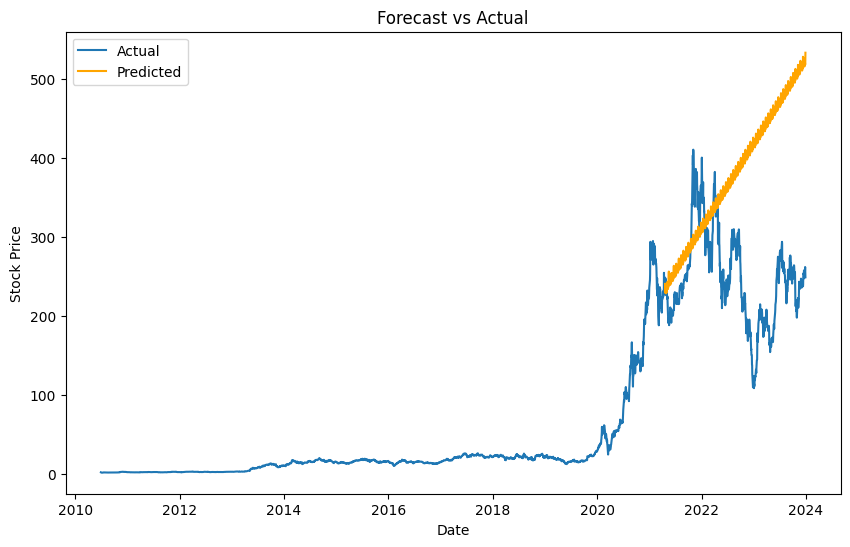

In [117]:

# Plot the results
TimeSeriesForecas.plot_forecast()

LSTM model

In [118]:
# Preprocess data for LSTM
TimeSeriesForecas.preprocess_for_lstm(window_size=60)



Data preprocessed for LSTM model.


In [119]:
# Train the LSTM model
lstm_model_tsla = TimeSeriesForecas.train_lstm(epochs=50, batch_size=32)



Epoch 1/50


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0014
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.1048e-04
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6257e-04
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.9762e-04
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8857e-04
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7014e-04
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.8387e-04
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.0567e-04
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.9235e-04
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.9148e-04
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3103e-04
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.7138e-04
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.2504e-04
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.9605e-04
Epoch 15/50
84/84 ━━━━━━━━━━━━

In [120]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecas.forecast_lstm()



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [121]:
# Evaluate the forecast
TimeSeriesForecas.evaluate_forecast()



Mean Absolute Error (MAE): 22.399872305864346
Root Mean Squared Error (RMSE): 29.126435220799706
Mean Absolute Percentage Error (MAPE): 9.146757350983709%


(np.float64(22.399872305864346),
 29.126435220799706,
 np.float64(9.146757350983709))

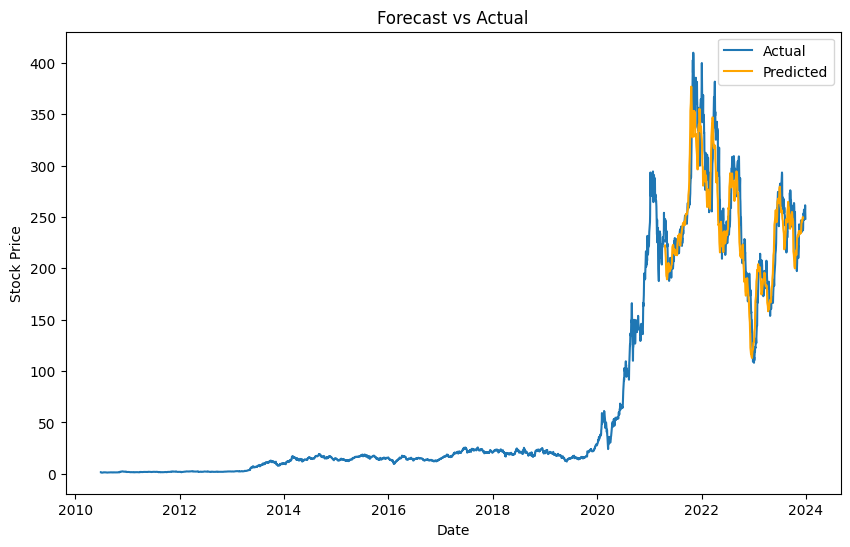

In [122]:
# Plot the results
TimeSeriesForecas.plot_forecast()

In [123]:
from Future_Market_Trends import FutureMarketForecast

In [124]:
lstm_model_tsla = TimeSeriesForecast.load_lstm_model(r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras')

LSTM model loaded from C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras


In [125]:
FutureMarketForecast_tesla= FutureMarketForecast(lstm_model_tsla ,tsla_data,test_tsla,input_shape = 60)

In [126]:
forcastet_tsla_data = FutureMarketForecast_tesla.forecast_future(periods=180)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

for BND data

In [127]:
BND_data

Ticker,BND
Date,
2010-01-04 00:00:00+00:00,51.721794
2010-01-05 00:00:00+00:00,51.872997
2010-01-06 00:00:00+00:00,51.853291
2010-01-07 00:00:00+00:00,51.813843
2010-01-08 00:00:00+00:00,51.866428
...,...
2023-12-22 00:00:00+00:00,71.401619
2023-12-26 00:00:00+00:00,71.469734
2023-12-27 00:00:00+00:00,71.927200


ARIMA model for bnd 

In [128]:
# Train the ARIMA model
TimeSeriesForecast_for_bnd.train_arima(order=(5, 1, 0))

ARIMA model trained successfully.


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [129]:
# Forecast future stock prices
predictions = TimeSeriesForecast_for_bnd.forecast_arima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [130]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 5.191597062382492
Root Mean Squared Error (RMSE): 6.11291564125035
Mean Absolute Percentage Error (MAPE): 7.4716687838902285%


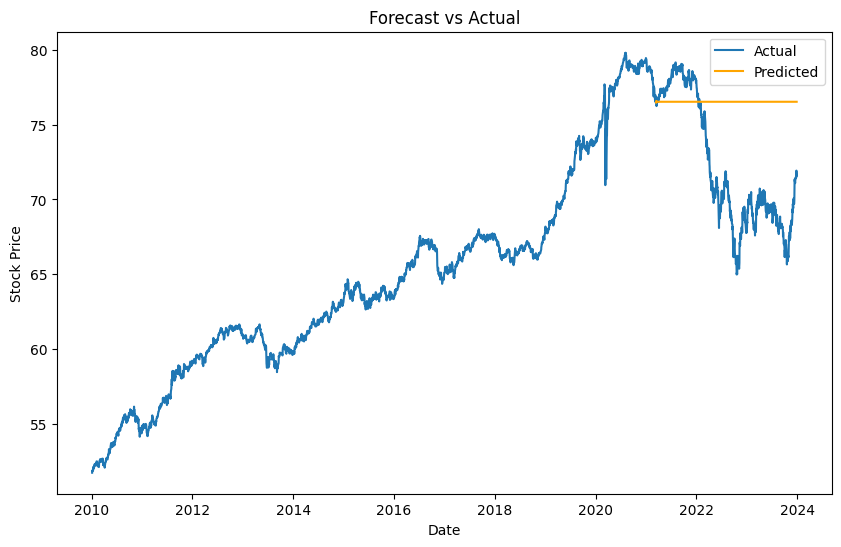

In [131]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

SARIMA model

In [132]:
# Train the SARIMA model
TimeSeriesForecast_for_bnd.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model trained successfully.


In [133]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecast_for_bnd.forecast_sarima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [134]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 7.650756119151286
Root Mean Squared Error (RMSE): 9.303769765589339
Mean Absolute Percentage Error (MAPE): 11.056960087635613%


(np.float64(7.650756119151286),
 9.303769765589339,
 np.float64(11.056960087635613))

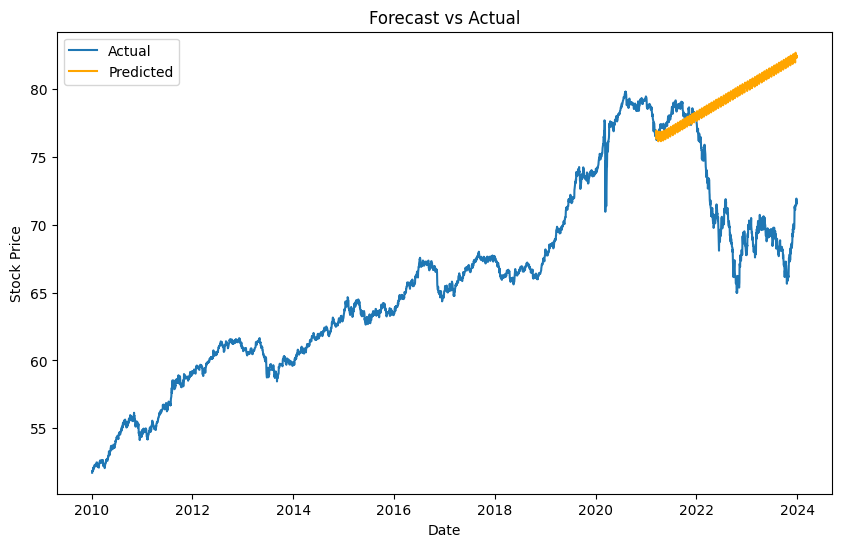

In [135]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

LSTM model

In [136]:
# Preprocess data for LSTM
TimeSeriesForecast_for_bnd.preprocess_for_lstm(window_size=60)

Data preprocessed for LSTM model.


In [137]:
# Train the LSTM model
TimeSeriesForecast_for_bnd.train_lstm(epochs=50, batch_size=32)

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0420
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0022
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0023
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0018
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014
Epoc

In [138]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast_for_bnd.forecast_lstm()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [139]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()

Mean Absolute Error (MAE): 0.6161309114266268
Root Mean Squared Error (RMSE): 0.7537542555979923
Mean Absolute Percentage Error (MAPE): 0.8665485195306658%


(np.float64(0.6161309114266268),
 0.7537542555979923,
 np.float64(0.8665485195306658))

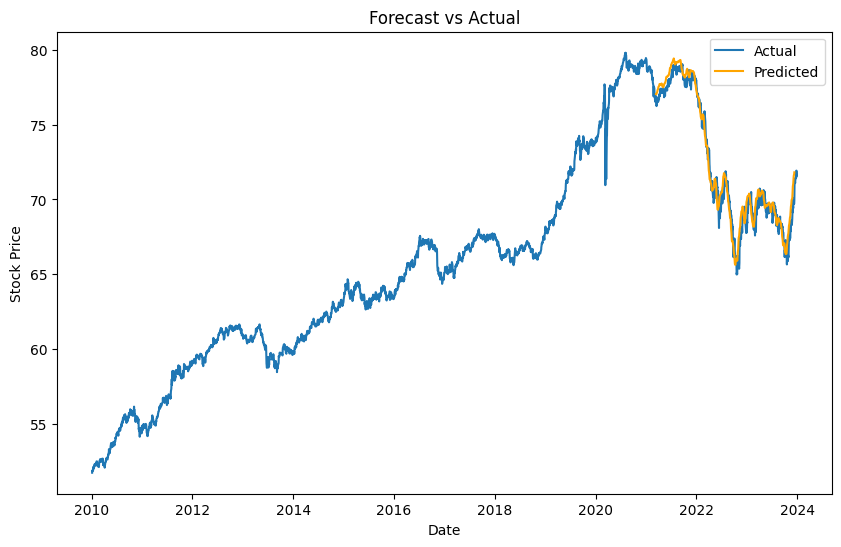

In [140]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

for tsla_data

In [141]:
SPY_data

Ticker,SPY
Date,
2010-01-04 00:00:00+00:00,86.315994
2010-01-05 00:00:00+00:00,86.544487
2010-01-06 00:00:00+00:00,86.605408
2010-01-07 00:00:00+00:00,86.970993
2010-01-08 00:00:00+00:00,87.260406
...,...
2023-12-22 00:00:00+00:00,469.225250
2023-12-26 00:00:00+00:00,471.206573
2023-12-27 00:00:00+00:00,472.058563


ARIMA model

In [142]:
# Train the ARIMA model
TimeSeriesForecast_for_spy.train_arima(order=(5, 1, 0))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model trained successfully.


In [143]:
# Forecast future stock prices
predictions = TimeSeriesForecast_for_spy.forecast_arima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [144]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 38.4079654587728
Root Mean Squared Error (RMSE): 45.388662266605664
Mean Absolute Percentage Error (MAPE): 9.037477327452361%


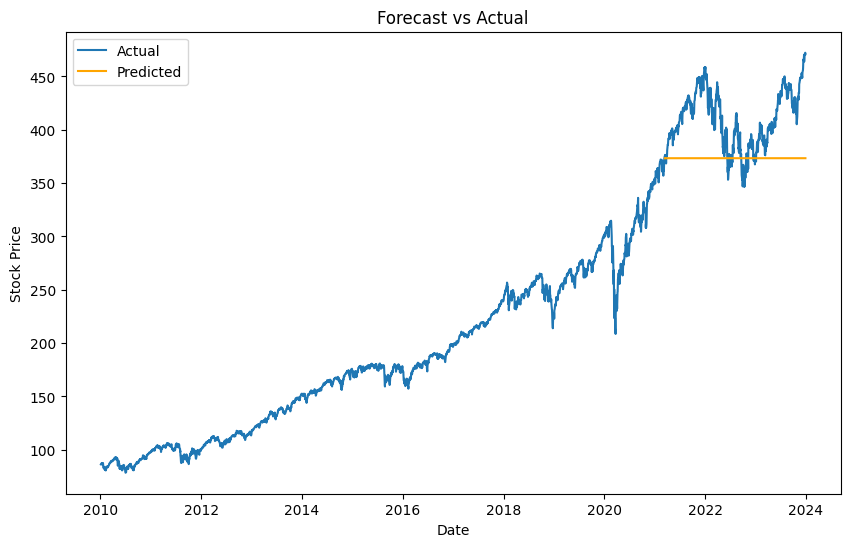

In [145]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

SARIMA model

In [146]:
# Train the SARIMA model
TimeSeriesForecast_for_spy.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA model trained successfully.


In [147]:

# Forecast future stock prices
sarima_predictions = TimeSeriesForecast_for_spy.forecast_sarima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [148]:
# Evaluate the forecast
TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 59.09194676010308
Root Mean Squared Error (RMSE): 69.14772170011007
Mean Absolute Percentage Error (MAPE): 14.663483891175435%


(np.float64(59.09194676010308),
 69.14772170011007,
 np.float64(14.663483891175435))

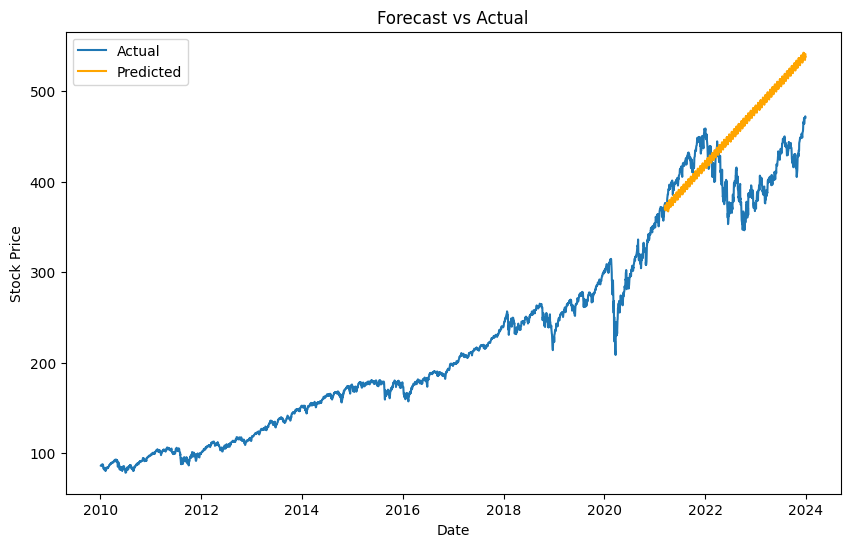

In [149]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

LSTM model

In [150]:
# Preprocess data for LSTM
TimeSeriesForecast_for_spy.preprocess_for_lstm(window_size=60)

Data preprocessed for LSTM model.


In [156]:
# Train the LSTM model
lstm_for_tesla = TimeSeriesForecast_for_spy.train_lstm(epochs=100, batch_size=32)

Epoch 1/100


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0012
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0012
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.9059e-04
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.4517e-04
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.7962e-04
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.6429e-04
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.5467e-04
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.1143e-04
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.9325e-04
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.0609e-04
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.1533e-04
Epoch 13/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.2477e-04
Epoch 14/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.9478e-04
Epoch 15/100
87/87 ━━━━━━

In [152]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast_for_spy.forecast_lstm()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [153]:
# Evaluate the forecast
TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 10.014935822369905
Root Mean Squared Error (RMSE): 13.25450984852674
Mean Absolute Percentage Error (MAPE): 2.4433911877553256%


(np.float64(10.014935822369905),
 13.25450984852674,
 np.float64(2.4433911877553256))

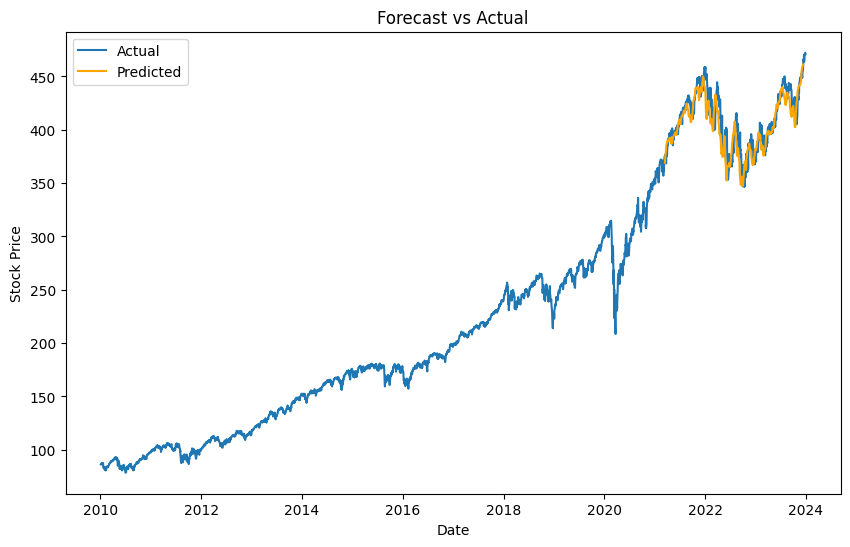

In [154]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

save the best models

In [155]:
TimeSeriesForecast_for_spy.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras')
TimeSeriesForecast_for_bnd.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras')
TimeSeriesForecas.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras')

LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras
LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras
LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras
